Exercises
Do your work for this exercise in either a python script named probability_distributions.py or a jupyter notebook named probability_distributions.ipynb.

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [3]:
def get_db_url(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/employees'

In [4]:
url = get_db_url(host, user, password, 'employees')

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [3]:
#What is the probability that no cars drive up in the noon hour?
λ= 2
stats.poisson(λ)
stats.poisson(λ).pmf(0)


0.1353352832366127

In [4]:
# What is the probability that 3 or more cars come through the drive through?
stats.poisson(λ).sf(2)

0.32332358381693654

In [5]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(λ).sf(0)

0.8646647167633873

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?



In [5]:
# What grade point average is required to be in the top 5% of the graduating class?
mean= 3.0
std_dev= 0.30

gpa= stats.norm(mean, std_dev)

gpa.isf(0.05)

3.4934560880854417

In [8]:
# What GPA constitutes the bottom 15% of the class?
gpa.isf(0.85)

2.689069983151863

In [49]:
# An eccentric alumnus left scholarship money for students in the third decile (30th percent) from the 
#bottom of their class. Determine the range of the third decile. 
#Would a student with a 2.8 grade point average qualify for this scholarship?
#ppf 30- ppf 20 will get answer
#**** figure out sentence ****
bottom_twenty= gpa.ppf(0.2)
bottom_thirty= gpa.ppf(0.3)


print(f'The range of gpa to receive the scholarship is, {bottom_twenty} to {bottom_thirty} and yes a student with a 2.8 gpa will qualify')




The range of gpa to receive the scholarship is, 2.7475136299281258 to 2.842679846187588 and yes a student with a 2.8 gpa will qualify


- 1st decile: 0-10 percentile
- 2nd decile: 10-20 percentile
- 3rd decile: 20-30 percentile

In [48]:
# If I have a GPA of 3.5, what percentile am I in?

gpa.sf(3.5)

0.0477903522728147

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?


In [26]:
avg_click_rate= 0.02 * 4326
visitors = 4326
click_thrus= 97

test_rate= click_thrus/visitors

test_rate

0.022422561257512713

In [23]:
marketing = stats.poisson(avg_click_rate)

In [29]:
likelyhood = marketing.sf(click_thrus-1)
likelyhood

0.14211867659283192

In [30]:
n_trials= 4326
p= 0.02
ct_data= stats.binom(n_trials, p)

likely= ct_data.sf(click_thrus-1)

likely

0.1397582363130086

In [ ]:
#answer: 13.98%

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [7]:
n_trials= 60
p= 0.01

stats.binom(n_trials, p).sf(0)

0.4528433576092388

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [4]:
# How likely is it that the break area gets cleaned up each day?

n_rate = round(0.9 * 3 * 22)
p = 0.03

stats.binom(n_rate, p).sf(0)

0.8342199288437355

Text(0.5, 0, 'Number of time area is cleaned per day')

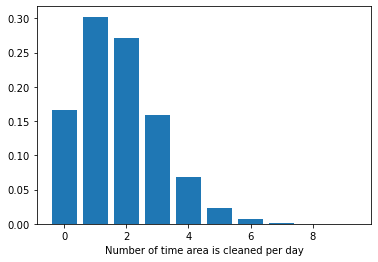

In [5]:
x = np.arange(0, 10)
y = stats.binom(n_rate,p).pmf(x)

plt.bar(x, y)
plt.xlabel('Number of time area is cleaned per day')

In [6]:
#  How likely is it that it goes two days without getting cleaned up?
stats.binom(n_rate * 2, p).pmf(0)

0.02748303199257622

In [7]:
# probability of not getting cleaned for a week (5 days)
stats.binom(n_rate * 5, p).pmf(0)

0.00012521651388091353

In [ ]:
#Another solution: all steps are below

#visitors per day = (3*22) * .90= 59.4

In [35]:
# How likely is it that the break area gets cleaned up each day? 
n_trials= 59.4
p= 0.03

break_data= stats.binom(n_trials, p)

In [36]:
daily_clean= break_data.sf(0)

daily_clean  #answer

0.8342199288437355

In [39]:
#How likely is it that it goes two days without getting cleaned up?
no_clean= 1- daily_clean

no_clean

0.16578007115626447

In [38]:
two_days_dirty = no_clean * no_clean
two_days_dirty

0.027483031992576113

In [40]:
#All week?
five_days_dirty = no_clean * no_clean * no_clean * no_clean * no_clean
five_days_dirty

0.0001252165138809122

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.


In [59]:
#Think about everything as time 

mean= 15*2 
std_dev= 3*2

line_time= stats.norm(mean, std_dev)

In [60]:
time= line_time.cdf(33) # This is the answer: About 70% probability

time

0.6914624612740131

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?

In [11]:
salary_df= pd.read_sql("select * from salaries WHERE to_date= '9999-01-01'", url)

In [12]:
#Looking at statistics
salary_df.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


In [13]:
#Parameters
mean_salary= salary_df.salary.mean()

std_salary= salary_df.salary.std()

In [14]:
# What percent of employees earn less than 60,000?

stats.norm(mean_salary, std_salary).cdf(60000)

0.24385742480214423

In [24]:
# What percent of employees earn more than 95,000?
stats.norm(mean_salary, std_salary).sf(95000)

0.09208819199804053

In [29]:
# What percent of employees earn between 65,000 and 80,000?
1- (stats.norm(mean_salary, std_salary).sf(80000) + stats.norm(mean_salary, std_salary).cdf(65000))

0.3350605685446666

In [16]:
#Another solution to What percent of employees earn between 65,000 and 80,000?
np.diff(stats.norm(mean_salary, std_salary).cdf([65000,80000]))

array([0.33506057])

In [25]:
# What do the top 5% of employees make?

stats.norm(mean_salary, std_salary).isf(0.05)

100484.64454102777